### Initialize the environment

In [19]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/OV_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [21]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import OV

### Load the experiment results

In [44]:
run=1
date_time='2017-02-13_2042' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [45]:
config

{u'dbns': {u'DM': {u'batchSize': 1,
   u'datafile': u'TCGA_Data/3.Methylation_0.5.out',
   u'epochs': [20, 800],
   'inputNodes': 15418,
   u'k': 1,
   u'lambdas': [0.0, 1.0],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': True},
  u'GE': {u'batchSize': 1,
   u'datafile': u'TCGA_Data/3.GE1_0.5.out',
   u'epochs': [20, 800],
   'inputNodes': 16046,
   u'k': 1,
   u'lambdas': [0.0, 1.0],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': True},
  u'ME': {u'batchSize': 1,
   u'datafile': u'TCGA_Data/3.miRNA_0.5.out',
   u'epochs': [20],
   'inputNodes': 799,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.0005],
   u'persistent': False}},
 u'p': 0.5,
 u'pathways': [u'ME', u'GE', u'DM'],
 u'runs': 5,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 120,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'persistent': True},
 u'uuid': u'4797780b8af51aafa438f1b51b1928f4

### Load the dataset

In [46]:
datafiles = OV.prepare_OV_TCGA_datafiles(config,data_dir)

### Look at the joint layer representation

In [47]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

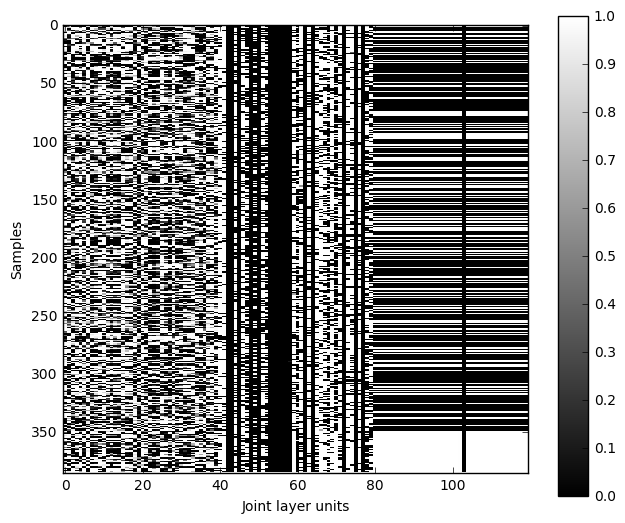

In [48]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
fig, ax = plt.subplots(figsize=(6,6))
cax = fig.add_axes([0.95,0.1,0.05,0.8])
im = ax.imshow(joint_layer, interpolation='none', cmap='gray')
ax.set_aspect(0.3)
ax.set_xlabel('Joint layer units')
ax.set_ylabel('Samples')
fig.colorbar(im,cax)

### Check the weights distributions

([array([  3.00000000e+00,   9.10000000e+01,   7.01000000e+02,
           3.39300000e+03,   6.28100000e+03,   4.15800000e+03,
           1.20100000e+03,   2.00000000e+02,   1.80000000e+01,
           0.00000000e+00]),
  array([  0.00000000e+00,   6.00000000e+00,   3.09000000e+02,
           3.01600000e+03,   6.45000000e+03,   4.88700000e+03,
           1.21200000e+03,   1.65000000e+02,   1.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   4.00000000e+01,   8.32000000e+02,
           3.23200000e+03,   5.42700000e+03,   4.64400000e+03,
           1.70500000e+03,   1.64000000e+02,   2.00000000e+00,
           0.00000000e+00]),
  array([    0.,    25.,   603.,  2630.,  5611.,  5088.,  1801.,   280.,
             8.,     0.]),
  array([  0.00000000e+00,   4.00000000e+00,   2.21000000e+02,
           2.69700000e+03,   6.74200000e+03,   4.76700000e+03,
           1.43600000e+03,   1.78000000e+02,   1.00000000e+00,
           0.00000000e+00]),
  array([  2.00000000e+00,  

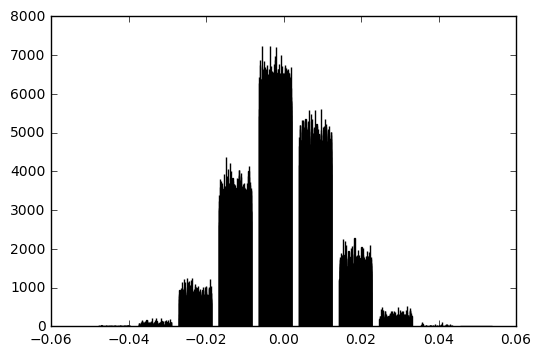

In [49]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x14763df90>,
 <a list of 3 Text xticklabel objects>)

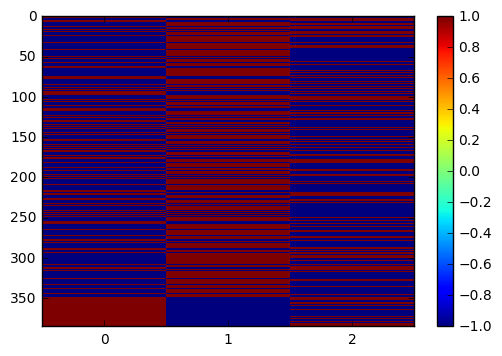

In [50]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

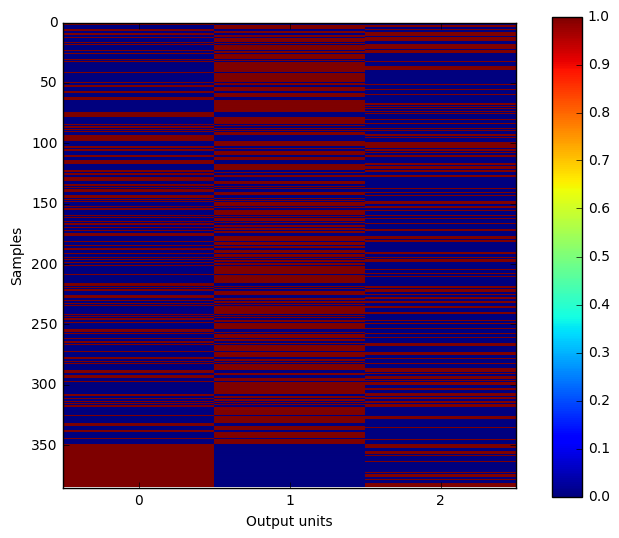

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))
cax = fig.add_axes([0.95,0.11,0.05,0.8])
im = ax.imshow(top_output, interpolation='none',extent=[0,3,385,0])
ax.set_aspect(0.008)
ax.set_xlabel('Output units')
ax.set_ylabel('Samples')
fig.colorbar(im,cax)

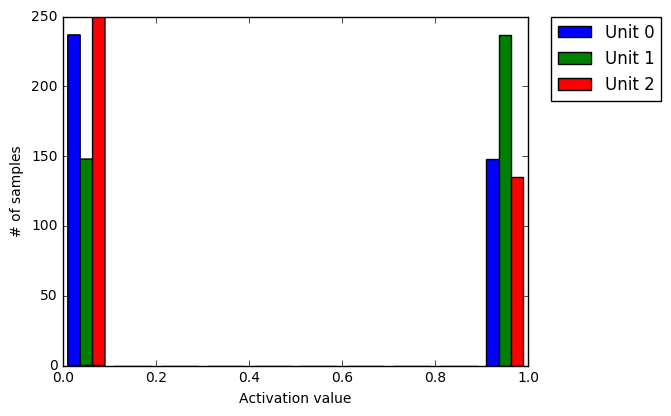

In [52]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.hist(top_output,label=["Unit 0", "Unit 1", "Unit 2"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_aspect(0.003)
ax.set_xlabel('Activation value')
ax.set_ylabel('# of samples')

In [53]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [54]:
code

array([[ 0.,  1.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  1.],
       ..., 
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.]], dtype=float32)

In [55]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

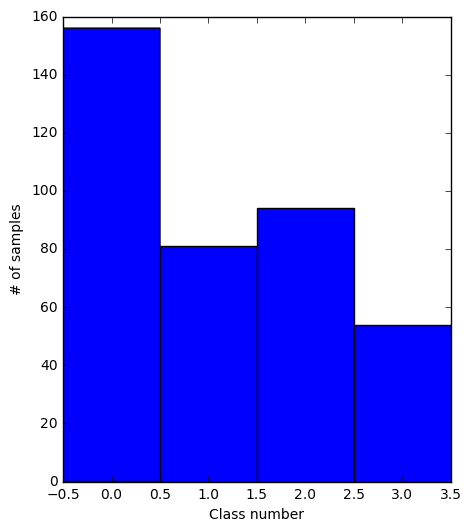

In [56]:
max_cl = np.max(cl)
fig, ax = plt.subplots(figsize=(6,6))
im = ax.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))
ax.set_aspect(0.03)
ax.set_xlabel('Class number')
ax.set_ylabel('# of samples')

Check Survival curves for the different classes
===============================================

In [57]:
import csv
id=[]
with open('../data/'+datafiles['ME']) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [58]:
stat={}
with open('../data/TCGA_Data/data_bcr_clinical_data_patient.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        patient_id=row[1]
        stat[patient_id]=(row[15],row[16],row[17])

In [59]:
import re
time_list = []
event_list = []
group_list = []
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(1)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(0)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
TCGA-24-0981
No data for TCGA-04-1519
No data for TCGA-04-1360
TCGA-01-0639
TCGA-01-0642
No data for TCGA-04-1357
TCGA-01-0628
TCGA-04-1331
TCGA-01-0636
TCGA-01-0633
TCGA-01-0637
TCGA-01-0631
TCGA-01-0630


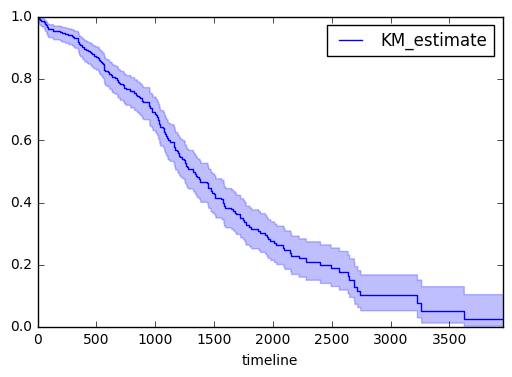

In [60]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

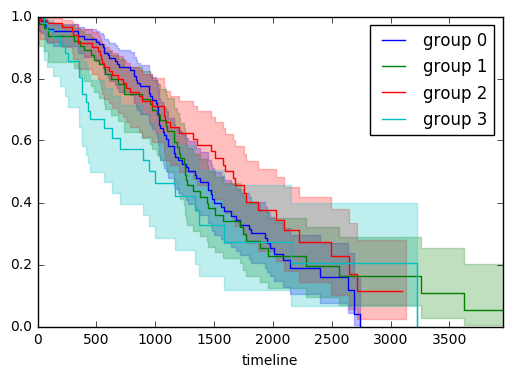

In [61]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [1,2,3]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)